# Quizzes for Lesson 3

### Q1: Import and image and zoom it 2x with opencv

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img_BGR = cv2.imread('../images/akin.jpeg')
img = cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB)

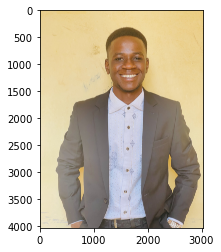

In [3]:
plt.imshow(img);

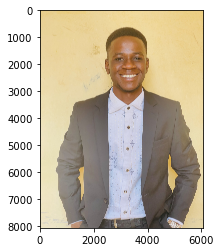

In [4]:
img_2x = cv2.resize(img,fx=2,fy=2,dsize=None)
plt.imshow(img_2x);

### Q2: Calculate dot product of 3D points using Python

<p style="text-align:center">
$
\begin{bmatrix}
    x' \\
    y' \\
    z'
\end{bmatrix}
$
$ = \begin{bmatrix}
s_x & 0 & 0\\
0 & s_y & 0\\
0 & 0 & s_z
\end{bmatrix}
$
$\begin{bmatrix}
x \\
y \\
z
\end{bmatrix}
$
</p>


In [5]:
import numpy as np

In [6]:
P = np.array([2,4,6])

In [7]:
Sx,Sy,Sz = 2,2,2

In [8]:
S = np.array([[Sx,0,0],[0,Sy,0],[0,0,Sz]])

In [9]:
S

array([[2, 0, 0],
       [0, 2, 0],
       [0, 0, 2]])

In [10]:
P_dash = P.dot(S)

In [11]:
P_dash

array([ 4,  8, 12])

In [12]:
type(P_dash)

numpy.ndarray

In [13]:
S.ndim

2

## Q3: Crop an image to half using python

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
img = cv2.imread('../images/ein.jpg', cv2.IMREAD_GRAYSCALE)

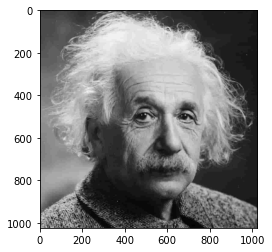

In [16]:
plt.imshow(img,cmap="gray");

In [17]:
numRows, numCols = img.shape
numRows,numCols

(1024, 1024)

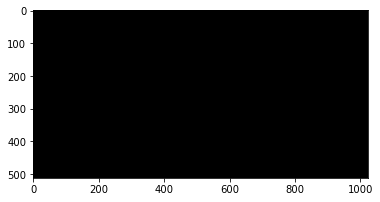

In [18]:
# create half new image

img2 = np.zeros((int(numRows/2),numCols),dtype='uint8')
plt.imshow(img2, cmap='gray');

In [19]:
for i in range(int(numRows/2)):
    for j in range(numCols):
        img2[i,j] = img[i, j]

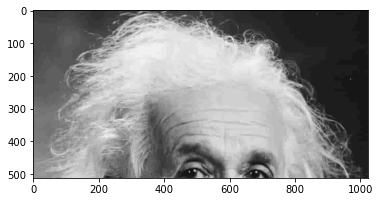

In [20]:
plt.imshow(img2, cmap='gray')

## Q4: Flip image Horizontally using python (as in Mirror Image)

In [21]:
img = plt.imread('../images/sam.jpg');

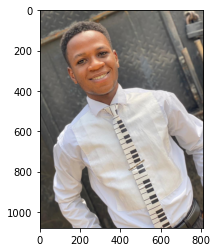

In [22]:
plt.imshow(img);

In [23]:
numRows,numCols = img.shape[:2]
numRows, numCols

(1080, 810)

In [24]:
img2 = np.zeros((numRows,numCols,3), dtype='uint8')

In [25]:
# flip horizontally

for i in range(numRows):
    for j in range(numCols):
        img2[i,numCols-j-1] = img[i,j]

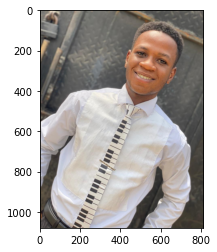

In [26]:
plt.imshow(img2);

## Q5: Why is inverse transformed image brighter than the image that has holes?

* It is because we are initiating the image with zeros `np.zeros`, so whenever there is hole, it becomes darker.
* To make it brighter, initiate it with arrays of ones `np.ones` then multiply with 255.

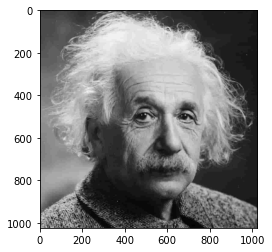

In [27]:
grayImg = cv2.imread('../images/ein.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(grayImg,cmap='gray')

In [28]:
S = np.array([[2,0],[0,2]])

In [29]:
grayImg.shape

(1024, 1024)

In [30]:
numRows,numCols = grayImg.shape

In [31]:
I2 = np.zeros((2*numRows, 2*numCols), dtype='uint8')

In [32]:
for i in range(numRows):
    for j in range(numCols):
        P = np.array([i,j])
        P_dash = S.dot(P)
        new_i, new_j = P_dash[0], P_dash[1]
        I2[new_i,new_j] = grayImg[i,j]

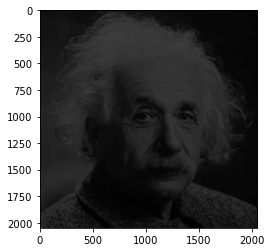

In [33]:
plt.imshow(I2, cmap='gray');

In [34]:
I2 = np.ones((2*numRows, 2*numCols), dtype='uint8') * 255

In [35]:
for i in range(numRows):
    for j in range(numCols):
        P = np.array([i,j])
        P_dash = S.dot(P)
        new_i, new_j = P_dash[0], P_dash[1]
        I2[new_i,new_j] = grayImg[i,j]

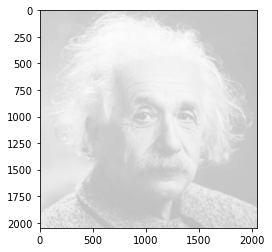

In [36]:
plt.imshow(I2, cmap='gray');

## Q6: 
- Write the code in function form in Python, and compute the resultant image size with respect to the given transformation matrix.
- Extend your code to handle colored images

In [59]:
I_gray = cv2.imread('../images/ein.jpg', cv2.IMREAD_GRAYSCALE)

In [60]:
# bilinear interpolation

def bilinearInterpolate(row,col,I):
    lc = int(col)
    rc = lc + 1
    wr = col - lc
    wl = rc - col
    tr = int(row)
    br = tr + 1
    wt = br - row
    wb = row - tr
    if tr >= 0 and br < I.shape[0] and lc >= 0 and rc < I.shape[1]:
        a = wl * I[tr,lc] + I[tr,rc]
        b = wl * I[br,lc] + wr*I[br,rc]
        g = wt * a + wb * b

        return np.uint8(g)
    else:
        return 0

In [61]:
def get_scaling_matrix(scale):
    size = len(scale)
    matrix = np.zeros((size,size))
    for i,_ in enumerate(matrix):
        matrix[i][i] = scale[i]
    return matrix

def f_scaleImage(scale, I_gray):
    numRows = I_gray.shape[0]
    numCols = I_gray.shape[1]
    S = get_scaling_matrix(scale)
    print(S)
    I2 = np.zeros((int(scale[0])*numRows, int(scale[1]*numCols)), dtype="uint8")
    Tinv = np.linalg.inv(S)
    for new_i in range(I2.shape[0]):
        for new_j in range(I2.shape[1]):
            P_dash = np.array([new_i,new_j])
            i,j = P[0], P[1]
            if i < 0 or i>=numRows or j<0 or j>=numCols:
                pass
            else:
                g = bilinearInterpolate(i,j,I_gray)
                I2[new_i,new_j]= g
    return I2

In [62]:
# display image as original

import matplotlib as mpl

def displayImageInActualSize(I):
    dpi = mpl.rcParams['figure.dpi']
    H,W = I.shape
    figSize = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize=figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(I,cmap='gray')
    plt.show

[[2. 0.]
 [0. 2.]]


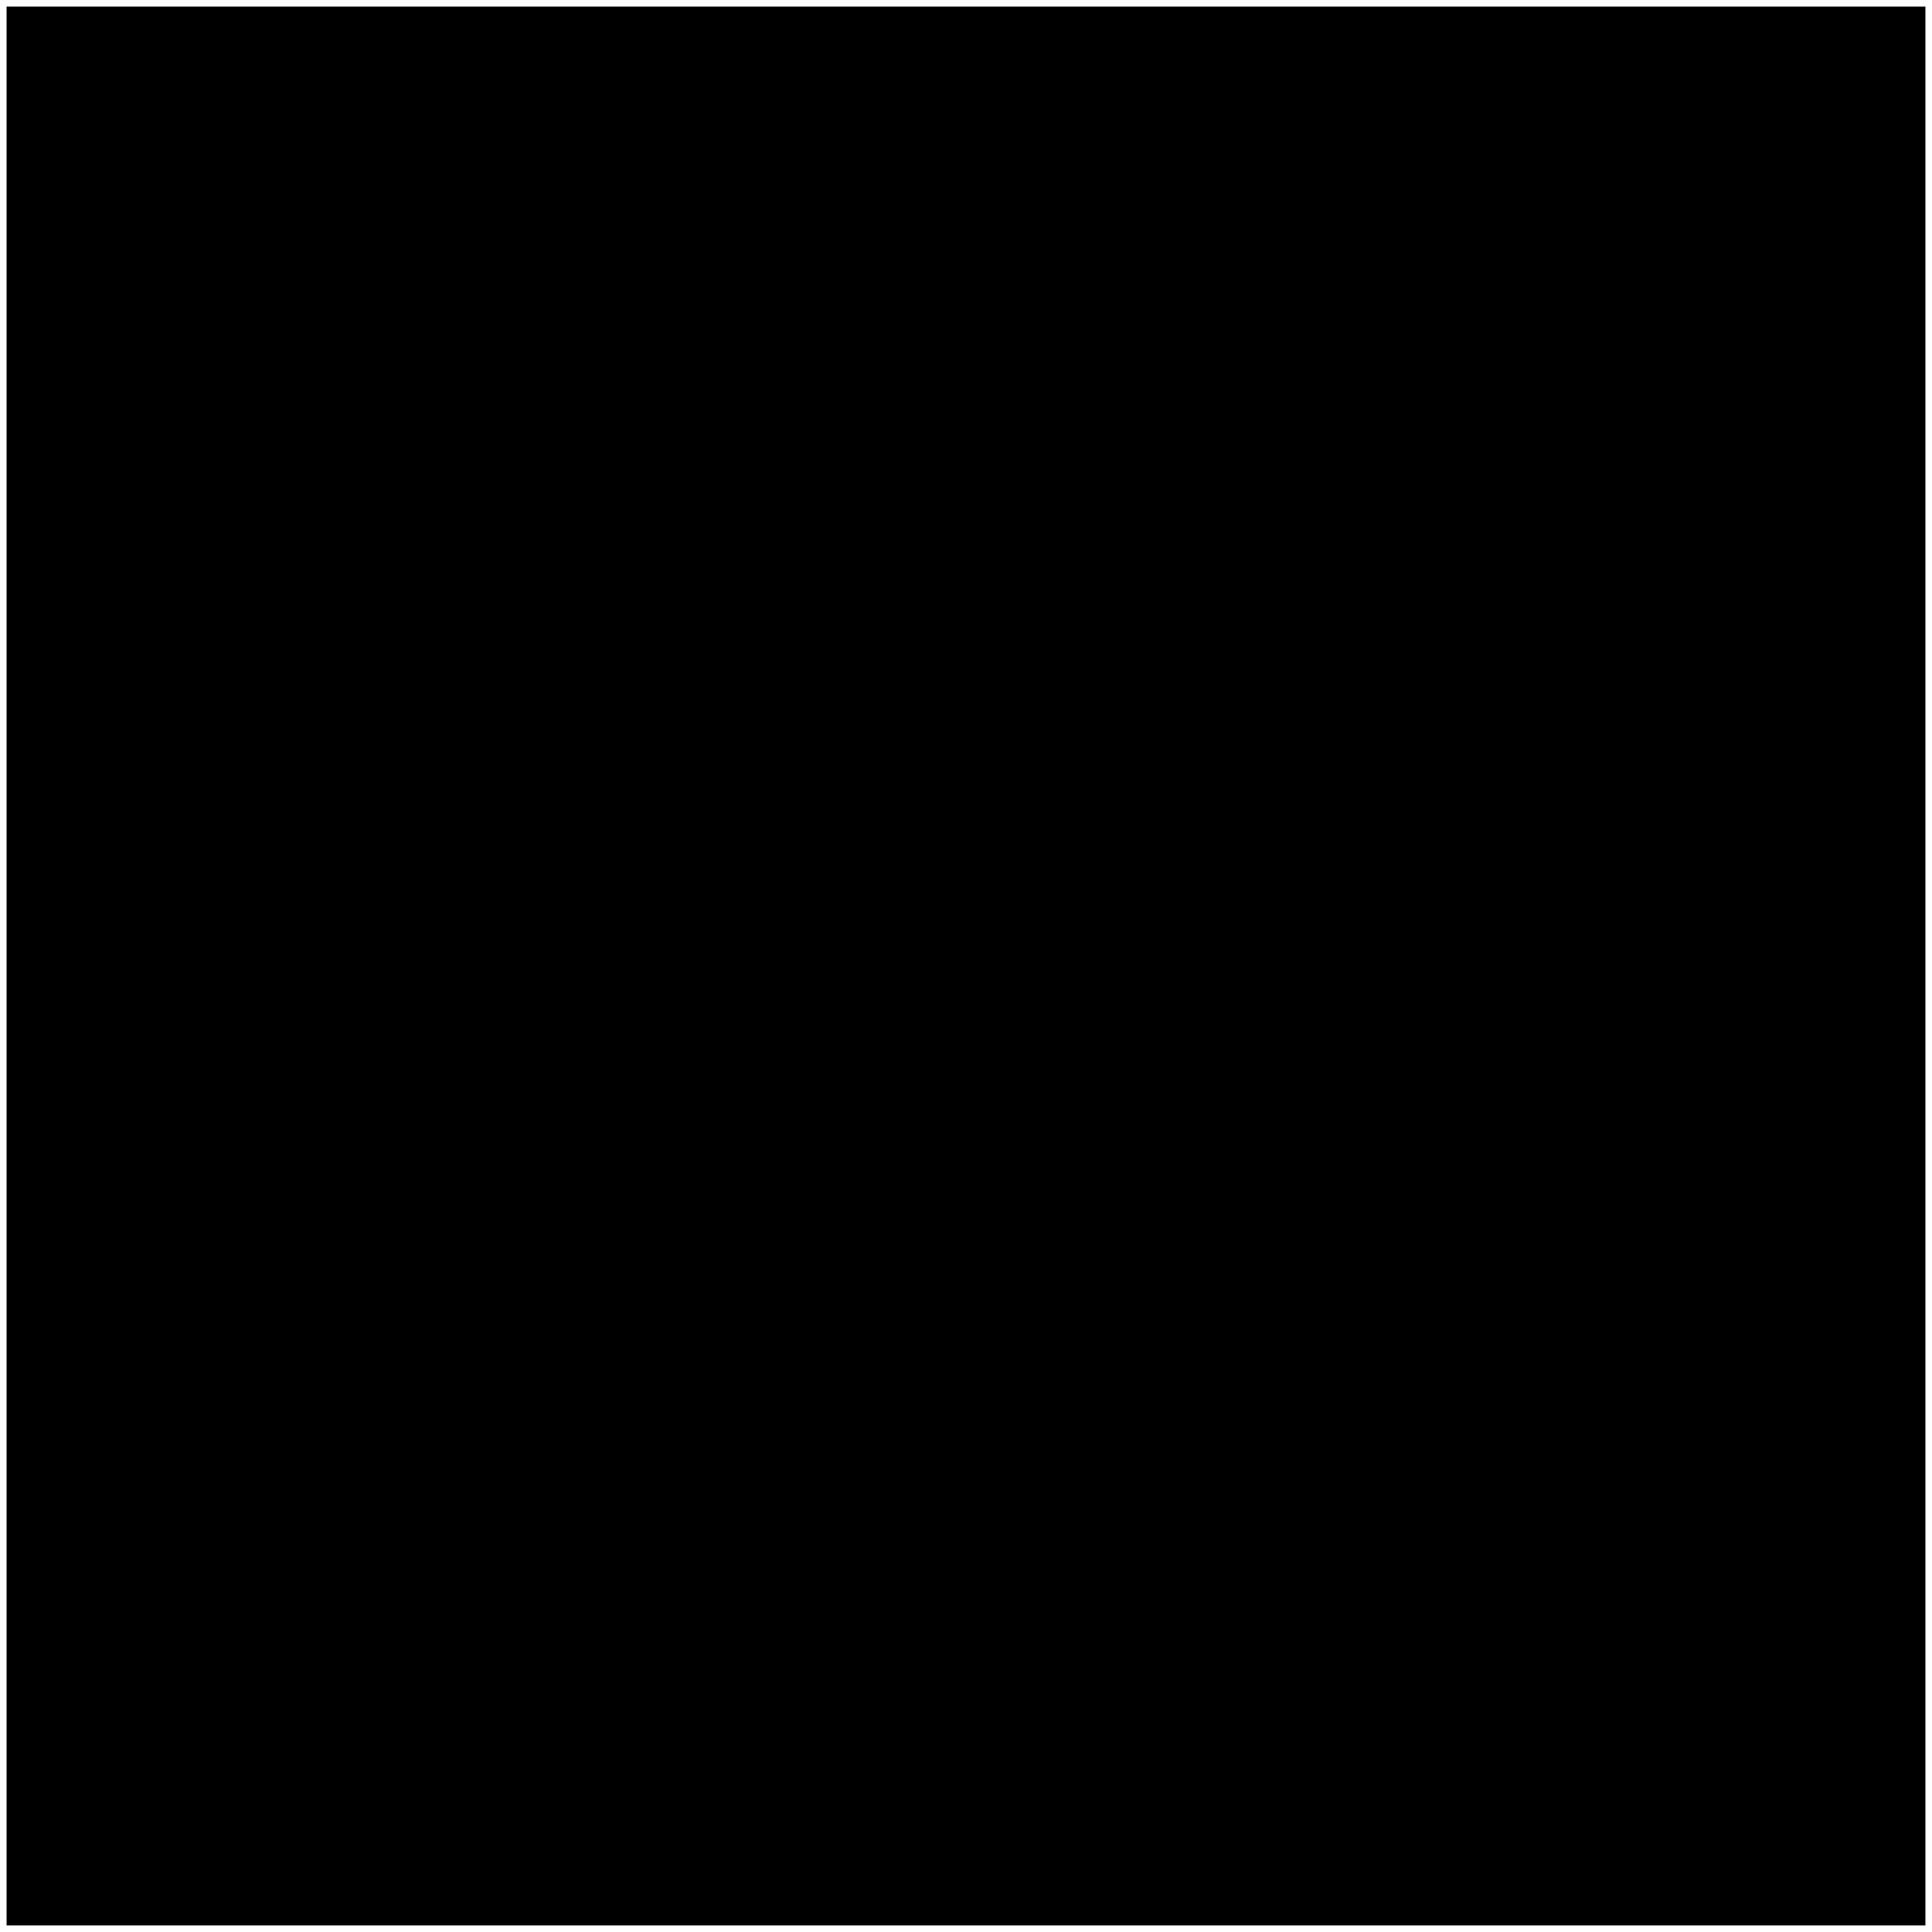

In [63]:
displayImageInActualSize(f_scaleImage([2,2],I_gray))

In [56]:
I_bgr = cv2.imread('../images/tulips.jpg')

In [55]:
def displayImageInActualSizeColor(I):
    dpi = mpl.rcParams['figure.dpi']
    H,W = I.shape[0:2]
    figSize = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize=figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(I, cmap='gray')
    plt.show

In [57]:
I_clr = I_bgr[:,:,::-1]
scale = [2,2]
r = f_scaleImage(scale,I_clr[:,:,0])
g = f_scaleImage(scale,I_clr[:,:,1])
b = f_scaleImage(scale,I_clr[:,:,2])

[[2. 0.]
 [0. 2.]]
[[2. 0.]
 [0. 2.]]
[[2. 0.]
 [0. 2.]]


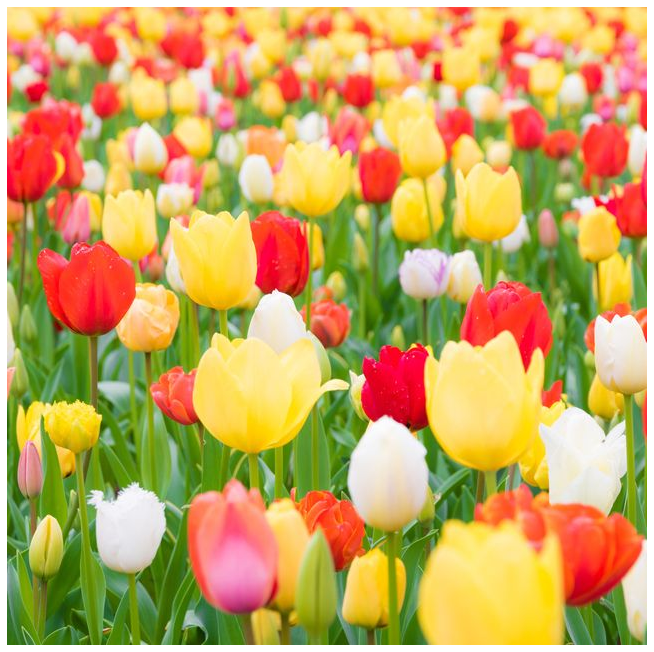

In [58]:
displayImageInActualSizeColor(I_clr)

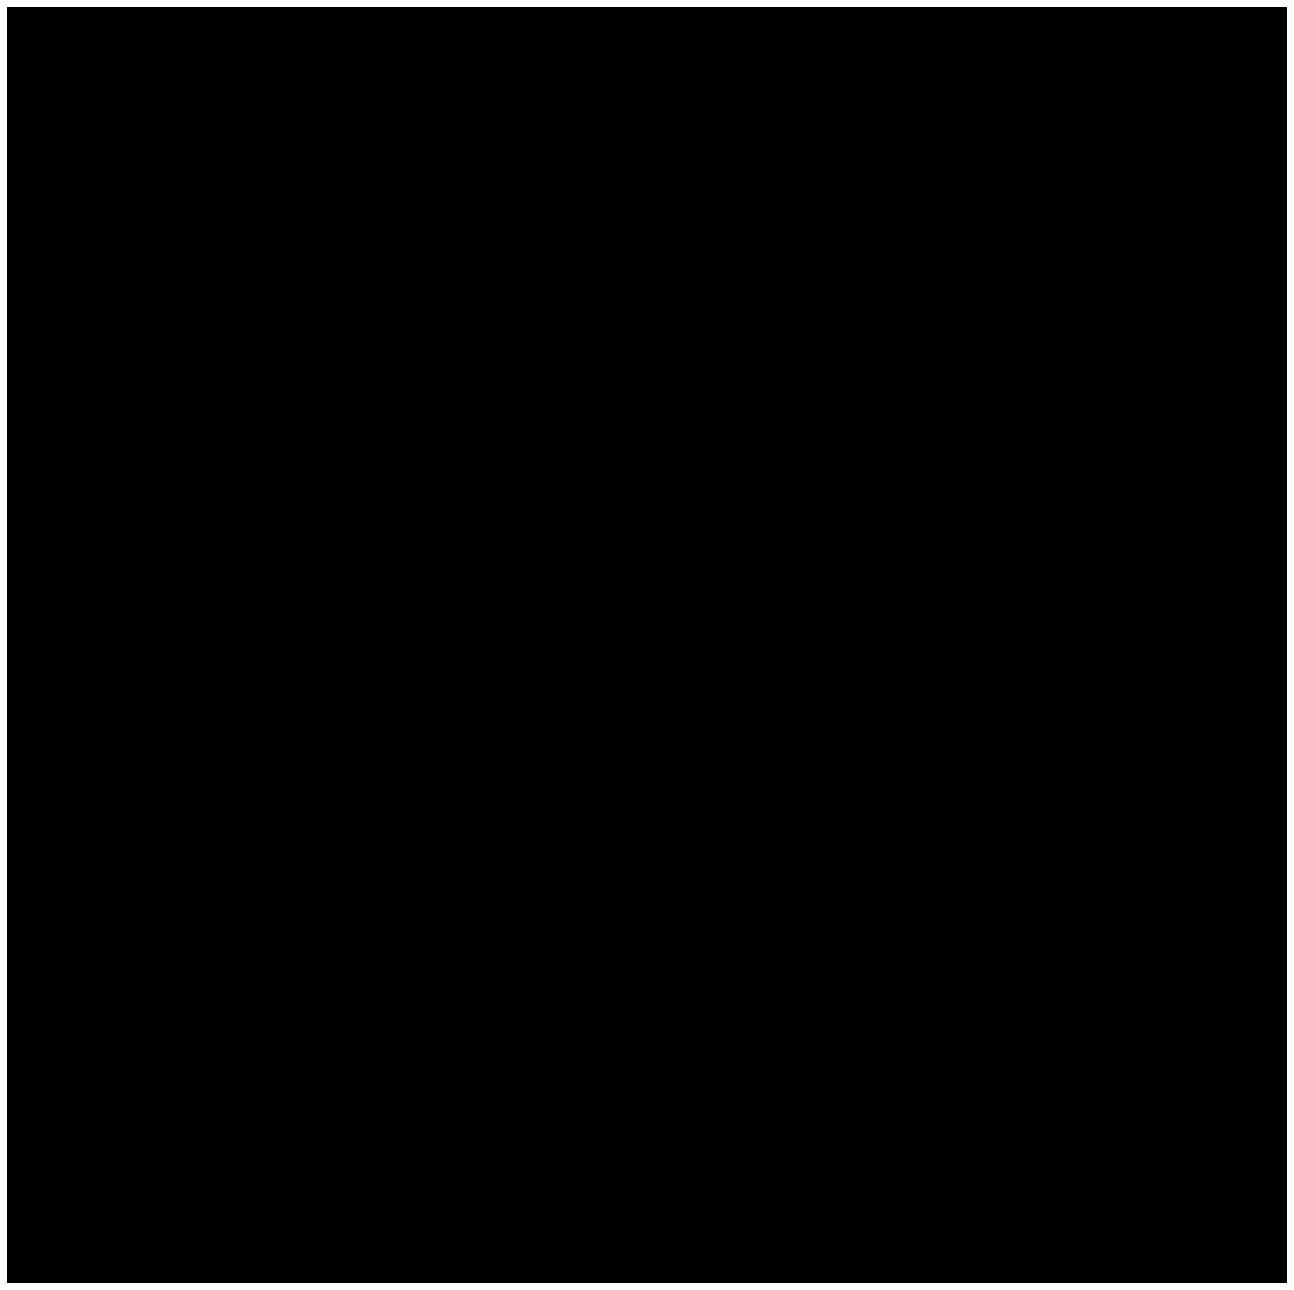

In [66]:
C = np.zeros((r.shape[0], r.shape[1],3),dtype=np.uint8)
C[:,:,0] = r
C[:,:,1] = g
C[:,:,2] = b
displayImageInActualSizeColor(C)